In [1]:
# Sample API
import flowx
import simulation
import numpy
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40

xmin, xmax = 0.0, 2.0*numpy.pi
ymin, ymax = 0.0, 2.0*numpy.pi

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 0.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.Scalars(tmax=2, dt=0.001, Re=1.0)

simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['to'])

In [3]:
simulation.get_initial(gridc, gridx, gridy, 'velc', 'pres')

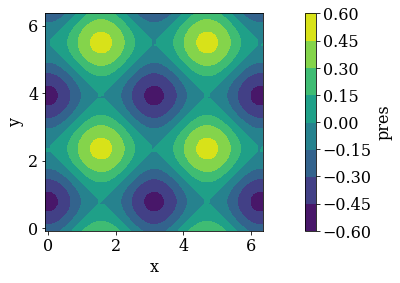

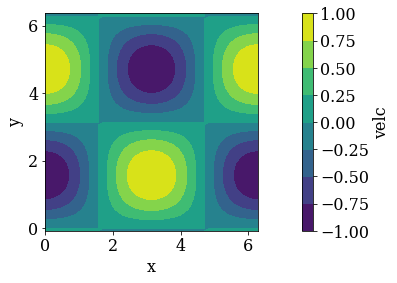

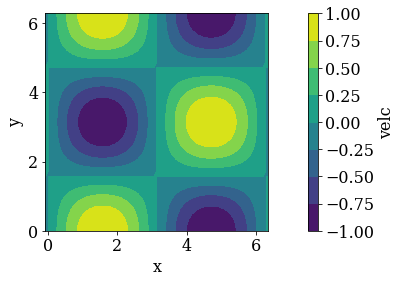

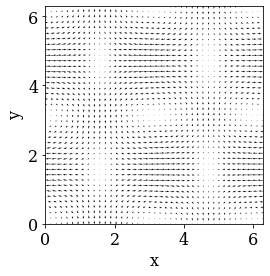

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx, gridy, 'velc')

In [5]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

while scalars.variable['time'] <= scalars.variable['tmax']:
    
    # Update the time-dependent boundary condition value
    simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['time'])
    
    # Predictor Step
    flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'predictor')
    
    # Divergence Step
    flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'divergence')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',
                                                                       maxiter=10000, tol=1e-9)
    # Corrector Step
    flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'corrector')
    
    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   
    
    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : 7417
Final poisson residual : 9.9957173175742e-10
Max, Min, U   : 0.9969173337331281, -0.996917333733128
Max, Min, V   : 0.996917333733128, -0.9969173337331281
Max, Min, P   : 1.4734081003521744, -1.487992108021577
Max, Min, DIV : 2.2339513572333658e-10, -2.233951773567e-10


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : 509
Final poisson residual : 9.92442445296659e-10
Max, Min, U   : 0.9771770479217199, -0.9771770479217198
Max, Min, V   : 0.9771770479217198, -0.9771770479217199
Max, Min, P   : 0.4726287590916012, -0.47418540636989753
Max, Min, DIV : 3.107910317989848e-10, -3.4293158590603667e-10


------------ Time = 0.02000000000000001 ---------------
Number of poisson iterations    : 459
Final poisson residual : 9.886572090780536e-10
Max, Min, U   : 0.9578276459586815, -0.9578276459586814
Max, Min, V   : 0.9578276459586814, -0.9578276459586815
Max, Min, P   : 0.454

------------ Time = 0.22000000000000017 ---------------
Number of poisson iterations    : 393
Final poisson residual : 9.866366184504943e-10
Max, Min, U   : 0.6420510717332313, -0.6420510717332312
Max, Min, V   : 0.6420510717332312, -0.6420510717332313
Max, Min, P   : 0.20417987231057136, -0.20475417361396844
Max, Min, DIV : 2.2482782302546411e-10, -4.083666998305757e-10


------------ Time = 0.23000000000000018 ---------------
Number of poisson iterations    : 390
Final poisson residual : 9.929021206836926e-10
Max, Min, U   : 0.6293376087080936, -0.6293376087080935
Max, Min, V   : 0.6293376087080935, -0.6293376087080936
Max, Min, P   : 0.1961797472080529, -0.1967261656676113
Max, Min, DIV : 2.299559431762077e-10, -4.1140125854599585e-10


------------ Time = 0.24000000000000019 ---------------
Number of poisson iterations    : 387
Final poisson residual : 9.993728322288082e-10
Max, Min, U   : 0.6168758891177192, -0.6168758891177192
Max, Min, V   : 0.6168758891177192, -0.61687588911771

------------ Time = 0.44000000000000034 ---------------
Number of poisson iterations    : 344
Final poisson residual : 9.96516656982041e-10
Max, Min, U   : 0.41350427439166537, -0.4135042743916653
Max, Min, V   : 0.4135042743916653, -0.41350427439166537
Max, Min, P   : 0.08473578123426209, -0.08492398267126303
Max, Min, DIV : 2.7746482889057233e-10, -3.907190829557927e-10


------------ Time = 0.45000000000000034 ---------------
Number of poisson iterations    : 342
Final poisson residual : 9.98875724223161e-10
Max, Min, U   : 0.4053163411653829, -0.40531634116538284
Max, Min, V   : 0.40531634116538284, -0.4053163411653829
Max, Min, P   : 0.08141501103480873, -0.08159354748846893
Max, Min, DIV : 2.797528320108711e-10, -3.8975338711652596e-10


------------ Time = 0.46000000000000035 ---------------
Number of poisson iterations    : 341
Final poisson residual : 9.80240438165767e-10
Max, Min, U   : 0.3972905398798565, -0.3972905398798565
Max, Min, V   : 0.3972905398798565, -0.39729053987

------------ Time = 0.6600000000000005 ---------------
Number of poisson iterations    : 305
Final poisson residual : 9.966494708319392e-10
Max, Min, U   : 0.26631181298178935, -0.2663118129817893
Max, Min, V   : 0.2663118129817893, -0.26631181298178935
Max, Min, P   : 0.03516432903223734, -0.03521841106373214
Max, Min, DIV : 2.967749379578777e-10, -3.5324455079782657e-10


------------ Time = 0.6700000000000005 ---------------
Number of poisson iterations    : 304
Final poisson residual : 9.804866909973694e-10
Max, Min, U   : 0.2610384857706667, -0.26103848577066663
Max, Min, V   : 0.26103848577066663, -0.2610384857706667
Max, Min, P   : 0.033786333133870035, -0.03383711809536581
Max, Min, DIV : 2.9219587860396246e-10, -3.4660768309310863e-10


------------ Time = 0.6800000000000005 ---------------
Number of poisson iterations    : 302
Final poisson residual : 9.878655003940097e-10
Max, Min, U   : 0.25586957743441174, -0.2558695774344117
Max, Min, V   : 0.2558695774344117, -0.25586957

------------ Time = 0.8800000000000007 ---------------
Number of poisson iterations    : 269
Final poisson residual : 9.85579132267925e-10
Max, Min, U   : 0.1715145069249544, -0.17151450692495437
Max, Min, V   : 0.17151450692495437, -0.1715145069249544
Max, Min, P   : 0.014594283425765018, -0.014607591971324014
Max, Min, DIV : 2.984345826018142e-10, -3.2467346259418273e-10


------------ Time = 0.8900000000000007 ---------------
Number of poisson iterations    : 267
Final poisson residual : 9.944906857196339e-10
Max, Min, U   : 0.1681182921407026, -0.16811829214070256
Max, Min, V   : 0.16811829214070256, -0.1681182921407026
Max, Min, P   : 0.014022468181802212, -0.014035658856837222
Max, Min, DIV : 3.01338176633692e-10, -3.2665275042156883e-10


------------ Time = 0.9000000000000007 ---------------
Number of poisson iterations    : 266
Final poisson residual : 9.791442766941456e-10
Max, Min, U   : 0.16478932691491419, -0.16478932691491419
Max, Min, V   : 0.16478932691491419, -0.164789

------------ Time = 1.0999999999999897 ---------------
Number of poisson iterations    : 233
Final poisson residual : 9.922872679856648e-10
Max, Min, U   : 0.11046158920378973, -0.11046158920378972
Max, Min, V   : 0.11046158920378972, -0.11046158920378973
Max, Min, P   : 0.006058209721892044, -0.006068425971060624
Max, Min, DIV : 3.029844708457574e-10, -3.130640845302665e-10


------------ Time = 1.1099999999999886 ---------------
Number of poisson iterations    : 232
Final poisson residual : 9.772353338957145e-10
Max, Min, U   : 0.10827430318891074, -0.10827430318891074
Max, Min, V   : 0.10827430318891074, -0.10827430318891074
Max, Min, P   : 0.005820904945052387, -0.005830970433071078
Max, Min, DIV : 2.9844030025039103e-10, -3.079741589789159e-10


------------ Time = 1.1199999999999875 ---------------
Number of poisson iterations    : 230
Final poisson residual : 9.86577249067661e-10
Max, Min, U   : 0.10613032833898393, -0.10613032833898392
Max, Min, V   : 0.10613032833898392, -0.10

------------ Time = 1.3199999999999654 ---------------
Number of poisson iterations    : 198
Final poisson residual : 9.821710393618186e-10
Max, Min, U   : 0.07114128657796835, -0.07114128657796835
Max, Min, V   : 0.07114128657796835, -0.07114128657796835
Max, Min, P   : 0.0025154954129997242, -0.0025225716055413024
Max, Min, DIV : 3.007974425095483e-10, -3.0294120174651634e-10


------------ Time = 1.3299999999999643 ---------------
Number of poisson iterations    : 196
Final poisson residual : 9.91919942867954e-10
Max, Min, U   : 0.06973259472106041, -0.0697325947210604
Max, Min, V   : 0.0697325947210604, -0.06973259472106041
Max, Min, P   : 0.0024169966251417416, -0.00242394380163456
Max, Min, DIV : 3.03808492252422e-10, -3.0571553443067487e-10


------------ Time = 1.3399999999999632 ---------------
Number of poisson iterations    : 195
Final poisson residual : 9.771700243967916e-10
Max, Min, U   : 0.06835179683182122, -0.0683517968318212
Max, Min, V   : 0.0683517968318212, -0.0683

------------ Time = 1.5399999999999412 ---------------
Number of poisson iterations    : 163
Final poisson residual : 9.800505712439845e-10
Max, Min, U   : 0.04582753376073071, -0.045827533760725854
Max, Min, V   : 0.045827533760730475, -0.04582753376072609
Max, Min, P   : 0.0010448715380390755, -0.0010494705628929656
Max, Min, DIV : 3.0047910687391877e-10, -3.001390336894623e-10


------------ Time = 1.54999999999994 ---------------
Number of poisson iterations    : 161
Final poisson residual : 9.903869739399259e-10
Max, Min, U   : 0.04492071057035331, -0.04492071057034857
Max, Min, V   : 0.04492071057035308, -0.0449207105703488
Max, Min, P   : 0.0010039770329011806, -0.0010084816340023665
Max, Min, DIV : 3.0365578801427873e-10, -3.0332148506220444e-10


------------ Time = 1.559999999999939 ---------------
Number of poisson iterations    : 160
Final poisson residual : 9.759639765040071e-10
Max, Min, U   : 0.04403183518363101, -0.04403183518362639
Max, Min, V   : 0.04403183518363079, 

------------ Time = 1.7799999999999148 ---------------
Number of poisson iterations    : 125
Final poisson residual : 9.915687669927514e-10
Max, Min, U   : 0.028367477801658453, -0.028367477801655674
Max, Min, V   : 0.02836747780165832, -0.02836747780165579
Max, Min, P   : 0.0004009147710456037, -0.00040364508916941003
Max, Min, DIV : 3.0403671594236847e-10, -3.0387295240838497e-10


------------ Time = 1.7899999999999137 ---------------
Number of poisson iterations    : 124
Final poisson residual : 9.777499080143154e-10
Max, Min, U   : 0.027806213465572285, -0.027806213465569572
Max, Min, V   : 0.027806213465572167, -0.027806213465569694
Max, Min, P   : 0.0003852339298590402, -0.00038790285572204664
Max, Min, DIV : 2.9979296475857176e-10, -2.996375800202924e-10


------------ Time = 1.7999999999999126 ---------------
Number of poisson iterations    : 122
Final poisson residual : 9.897966282411097e-10
Max, Min, U   : 0.027256056891713842, -0.02725605689171119
Max, Min, V   : 0.02725605

In [6]:
simulation.get_analytical(gridc, gridx, gridy, 'asol', scalars.variable['time'])

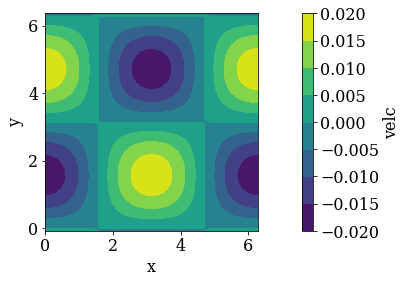

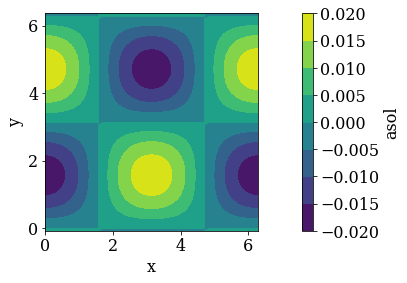

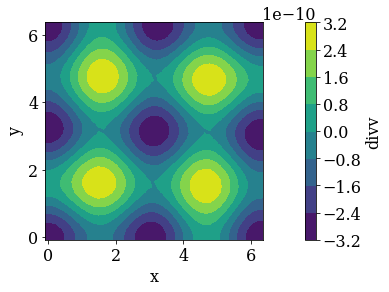

In [7]:
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridx, 'asol')
flowx.io.plot_contour(gridc, 'divv')

In [8]:
gridx.get_error('eror','velc','asol')
gridy.get_error('eror','velc','asol')

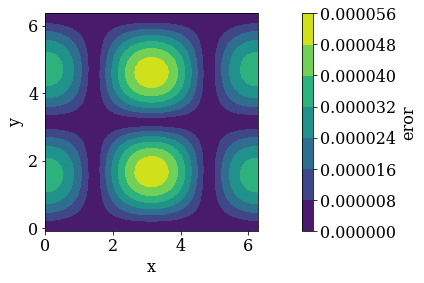

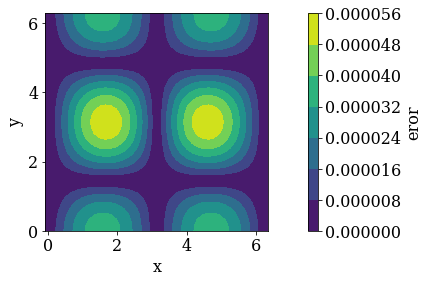

In [9]:
flowx.io.plot_contour(gridx, 'eror')
flowx.io.plot_contour(gridy, 'eror')

NoneType

In [18]:
ve=flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'corrector')